In [1]:
import pandas as pd
import numpy as np

In [15]:
#load data
data = pd.read_csv(filepath_or_buffer=r'C:\Users\pc\Python projects\data analysis\data sets\Movies\tmdb_5000_movies.csv',header=0)
data.head(5)


,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [20]:
# choose the columns needed
needed= data[['original_title','popularity','vote_average','revenue']]
needed

,original_title,popularity,vote_average,revenue
0,Avatar,150.437577,7.2,2787965087
1,Pirates of the Caribbean: At World's End,139.082615,6.9,961000000
2,Spectre,107.376788,6.3,880674609
3,The Dark Knight Rises,112.312950,7.6,1084939099
4,John Carter,43.926995,6.1,284139100
...,...,...,...,...
4798,El Mariachi,14.269792,6.6,2040920
4799,Newlyweds,0.642552,5.9,0
4800,"Signed, Sealed, Delivered",1.444476,7.0,0
4801,Shanghai Calling,0.857008,5.7,0


In [23]:
# generate id
from sklearn import preprocessing
le = preprocessing.LabelEncoder() 
movie_id = le.fit_transform(needed['original_title'])

needed.insert(loc = 1,column='movie id',value=movie_id)

In [54]:
# movies with no revenue
ex=needed[(needed.revenue == 0)]
ex

,original_title,movie id,popularity,vote_average,revenue
83,The Lovers,3918,2.418535,4.8,0
135,The Wolfman,4274,21.214571,5.5,0
265,The Cat in the Hat,3538,18.251129,4.9,0
309,Son of the Mask,3158,17.815595,3.6,0
376,Volcano,4517,19.836124,5.2,0
...,...,...,...,...,...
4797,Cavite,700,0.022173,7.5,0
4799,Newlyweds,2463,0.642552,5.9,0
4800,"Signed, Sealed, Delivered",3081,1.444476,7.0,0
4801,Shanghai Calling,3034,0.857008,5.7,0


In [57]:
# remove the unwanted data
needed.drop(ex.index,axis=0)

,original_title,movie id,popularity,vote_average,revenue
0,Avatar,372,150.437577,7.2,2787965087
1,Pirates of the Caribbean: At World's End,2665,139.082615,6.9,961000000
2,Spectre,3188,107.376788,6.3,880674609
3,The Dark Knight Rises,3594,112.312950,7.6,1084939099
4,John Carter,1891,43.926995,6.1,284139100
...,...,...,...,...,...
4775,Funny Ha Ha,1388,0.362633,6.3,76901
4788,Pink Flamingos,2660,4.553644,6.2,6000000
4792,キュア,4750,0.212443,7.4,99000
4796,Primer,2719,23.307949,6.9,424760


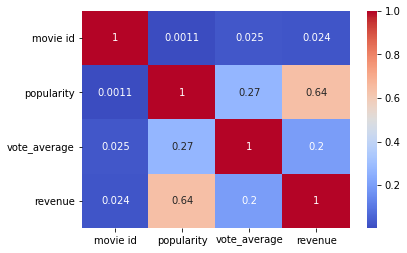

In [63]:
# correlation and visualization
import seaborn as sns
import matplotlib.pyplot as mt

c= needed.corr()
colors=sns.color_palette("coolwarm", as_cmap=True)
sns.heatmap(c,annot=True,cmap=colors)
mt.show()